**Analyse Dataset**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\personal programs\ML Projects\data\churn.csv")
df.shape

(7043, 21)

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df["Churn"].value_counts(normalize=True).round(3)

Churn
No     0.735
Yes    0.265
Name: proportion, dtype: float64

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isna().mean().sort_values(ascending=False).head(10)

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
dtype: float64

In [8]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].isna().sum()

11

**Exploratory Data Analysis**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

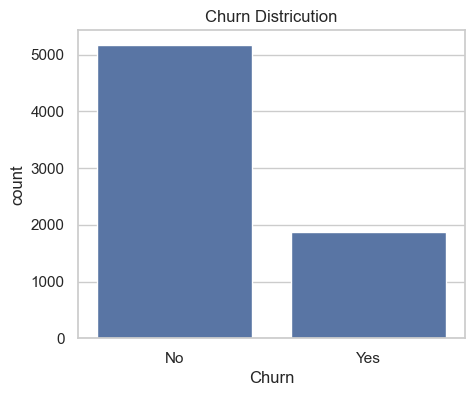

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
sns.countplot(x="Churn",data=df)
plt.title("Churn Districution")
plt.show()

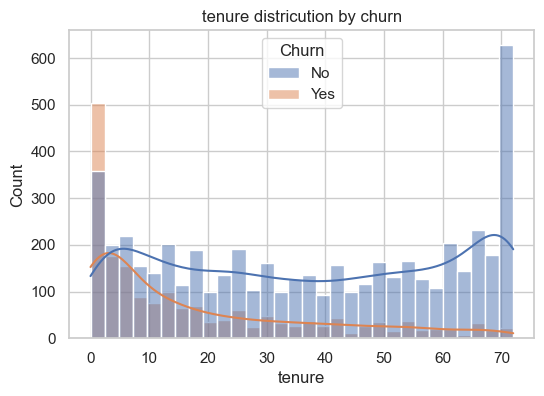

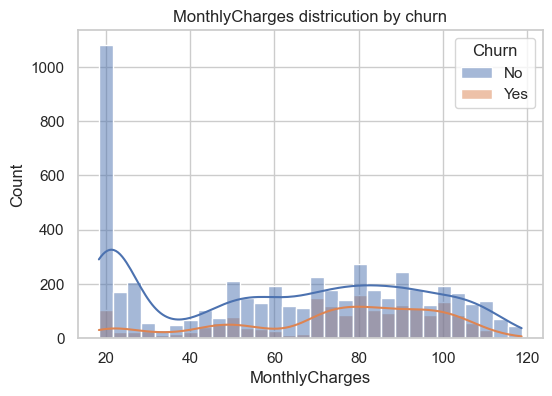

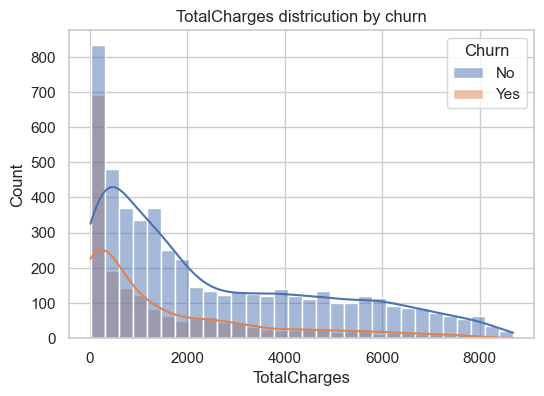

In [11]:
numeric_cols = ["tenure","MonthlyCharges","TotalCharges"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df,x=col,hue="Churn",kde=True,bins=30)
    plt.title(f"{col} districution by churn")
    plt.show()

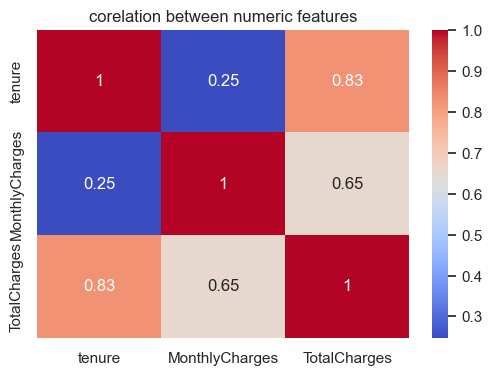

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="coolwarm")
plt.title("corelation between numeric features")
plt.show()